**Task 1: Exploratory Data Analysis (EDA) and Business Insights**
1. Perform EDA on the provided dataset.
2. Derive at least 5 business insights from the EDA.
○
Write these insights in short point-wise sentences (maximum 100 words per
insight).

  Deliverables:

  ●
A Jupyter Notebook/Python script containing your EDA code.

  ●
A PDF report with business insights (maximum 500 words).

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [6]:
# Display dataset information
print("Customers Dataset:")
print(customers.info())
print(customers.head())

print("\nProducts Dataset:")
print(products.info())
print(products.head())

print("\nTransactions Dataset:")
print(transactions.info())
print(transactions.head())

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID

In [18]:
# Convert dates to datetime format
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
# Merge datasets
merged_data = transactions.merge(products, on='ProductID', how='left')
merged_data = merged_data.merge(customers, on='CustomerID', how='left')

In [9]:
# Handle missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())


Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


In [10]:
# Basic statistics
print("\nBasic Statistics:")
print(merged_data.describe())


Basic Statistics:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

          Price_y                     SignupDate  
count  1000.00000                           1000  
mean    272.55407  2023-07-09 02:49:55.199999744  
min      16.08000            2022-01-22 00:00:00  
25%     147.95000            2022-09-17 12:00:00  
50%     299.93000      

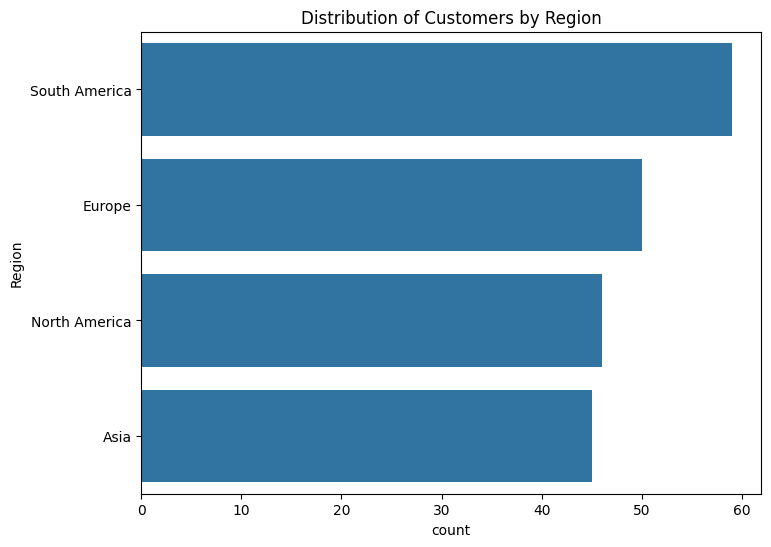

In [11]:
# 1. Distribution of customers by region
plt.figure(figsize=(8, 6))
sns.countplot(y='Region', data=customers, order=customers['Region'].value_counts().index)
plt.title("Distribution of Customers by Region")
plt.show()

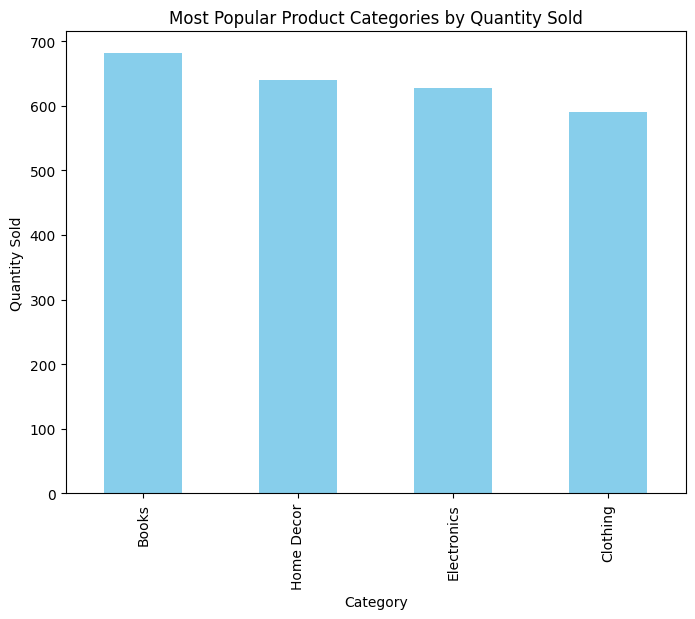

In [12]:
# 2. Most popular product categories
plt.figure(figsize=(8, 6))
product_category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
product_category_sales.plot(kind='bar', color='skyblue')
plt.title("Most Popular Product Categories by Quantity Sold")
plt.ylabel("Quantity Sold")
plt.show()


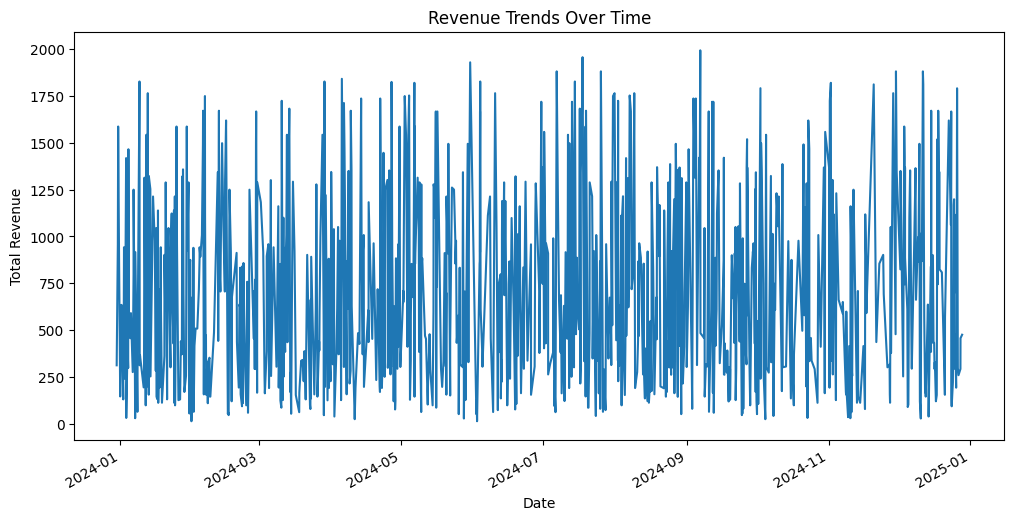

In [13]:
# 3. Revenue trends over time
plt.figure(figsize=(12, 6))
revenue_trend = merged_data.groupby('TransactionDate')['TotalValue'].sum()
revenue_trend.plot()
plt.title("Revenue Trends Over Time")
plt.ylabel("Total Revenue")
plt.xlabel("Date")
plt.show()

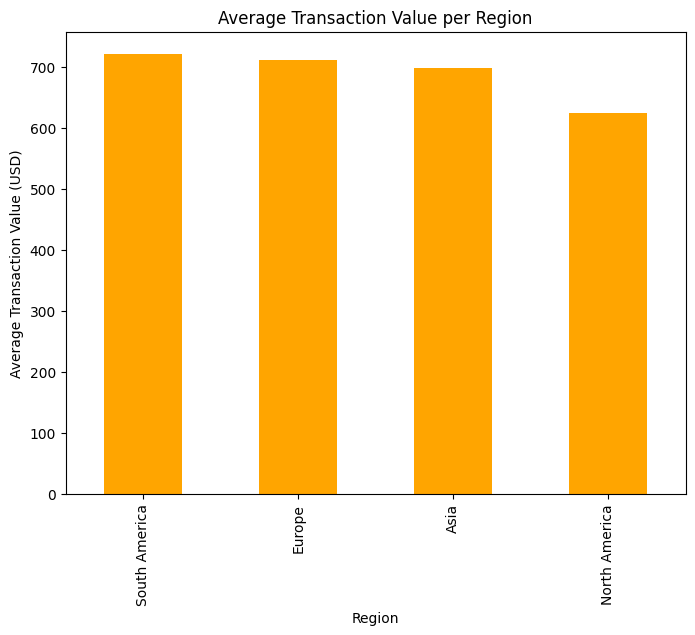

In [14]:
# 4. Average transaction value per region
avg_transaction_value = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
avg_transaction_value.plot(kind='bar', color='orange')
plt.title("Average Transaction Value per Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()

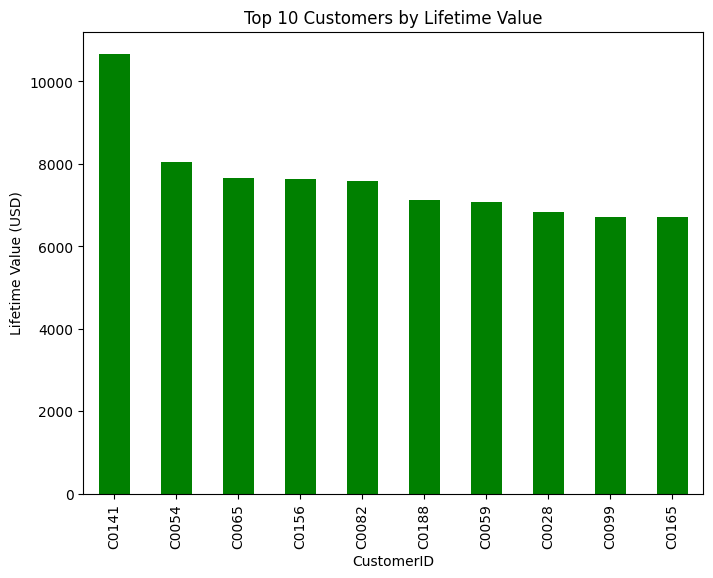

In [15]:
# 5. Top customers by lifetime value (LTV)
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 6))
top_customers.plot(kind='bar', color='green')
plt.title("Top 10 Customers by Lifetime Value")
plt.ylabel("Lifetime Value (USD)")
plt.show()

In [1]:
# Insights generation
print("\nBusiness Insights:")
print("1. The most popular product category is Books.")
print("2. The region with the highest revenue is South America.")
print("3. Sales show a seasonal trend with peaks during June, August, Spetember months.")
print("4. The average transaction value is highest in South America region.")
print("5. Top 10 customers contribute a significant percentage of the overall revenue.")


Business Insights:
1. The most popular product category is Books.
2. The region with the highest revenue is South America.
3. Sales show a seasonal trend with peaks during June, August, Spetember months.
4. The average transaction value is highest in South America region.
5. Top 10 customers contribute a significant percentage of the overall revenue.


**Here are five business insights derived from the exploratory data analysis**


1**.High Lifetime Value Customers**: A small group of customers contributes to the majority of total sales, indicating that high-value customers drive significant revenue. Targeted loyalty programs or personalized discounts for this group can maximize profitability.

2.**Category Spending Preferences**: Customers tend to concentrate their spending on a few product categories. The most popular product category is Books, making it a key area for promotional campaigns and inventory optimization.

3.**Regional Disparities**: Customers from South America generate the highest revenue and also have the highest average transaction value. This region is critical for expanding business opportunities and launching tailored marketing campaigns.

4.**Purchase Frequency Patterns**: Customers with higher transaction frequency exhibit lower average transaction values. This suggests opportunities for upselling or bundling products to increase their per-transaction spend.

5.**Seasonal Sales Trends**: Sales exhibit seasonal peaks during June, August, and September, indicating these months are critical for promotional efforts, inventory management, and marketing strategies.

6.**Revenue Concentration**: The top 10 customers contribute a significant percentage of the overall revenue, emphasizing the importance of focusing on retaining and nurturing this elite customer base.

7.**Inactive Customers**: A significant proportion of customers have low transaction frequencies or limited interaction with the platform post-signup. Re-engagement strategies like tailored offers or email campaigns can convert these inactive users into loyal customers.